In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
D:\python\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
final = pd.DataFrame(test['PassengerId'])
final.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# 分类-Survived,Sex,Embarked,Pclass(有序)
# 数字-Age,Fare(连续),SibSp,Parch(离散)
# 混合-Ticket,Cabin
# 可能存在错误-Name
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
display(train.info())
display(test.info())
# Cabin,Age,Embarked训练集存在许多空值
# Cabin,Age-测试集上存在空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


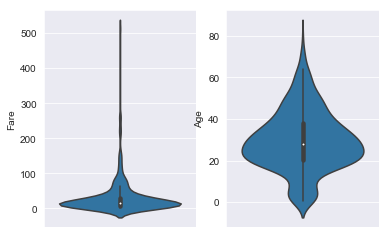

In [8]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,2)
p1 = sns.violinplot(data=train,y='Fare',orient='v',ax=axes[0])
p2 = sns.violinplot(data=train,y='Age',orient='v',ax=axes[1])

### 数值数据特征
1. **PassengerId-count 样本数有891个**
2. **Survivied-mean 幸存率大约为38.38%**
3. **SibSp-75% 有25%的人有兄弟姐妹，Parch-75% 有不到1/4的人有父母儿女**
4. **Fare-max,75% 票价差异较大，主要集中在100元以下，只有很少的顾客票价在512**
5. **Age-mean,max 年龄差异较大，主要集中在20-40岁，老年人相对幼儿来说较少**

In [9]:
train.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Barbara, Miss. Saiide",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### 分类数据特征
1. **Name-count 名称唯一,包含891个乘客**
2. **Sex-freq,top 男性为577/891=65%**
3. **Embarked-freq 有644/889=73.4%的人在S港上船**
4. **Ticket-unique 传票有很高的重复率，可能是一个团体购票**

* 探寻每个特征与生存之间的相关性
* 补全年龄，其与生存明确存在相关
* 删除Ticket,PassengerId,Name,Cabin列，前三者与存活没有关系，后者缺失值太多
* 创造Famliy用于记录船上的家庭成员总数
* 提取Name的title用于预测Age的空值
* 将Age和Fare分组，将连续特征变为有序的可分特征值

## 做出假设
**探寻具有哪些属性的人最可能活下来-女性，儿童，高等仓的人可能幸存下来**

## 验证假设
1. **Pclass和Sex与幸存具有明显的相关性**
2. **？SibSp和Parch中只有部分体现出与幸存的相关，所以需要将其导出一个特征**

In [10]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()
# 高等仓的人幸存率确实高于其他仓

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train[['Sex','Survived']].groupby('Sex').mean().reset_index()
# 女性的幸存率缺失高于男性

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train[['SibSp','Survived']].groupby('SibSp').mean().reset_index().sort_values(by='Survived',ascending=False)
# 兄弟姐妹少的人幸存率较高

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train[['Parch','Survived']].groupby('Parch').mean().reset_index().sort_values(ascending=False,by='Survived')
# 父母子女少的人幸存率高

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 可视化分析

1. **数值特征与生存之间的相关性**
***连续变量-直方图***

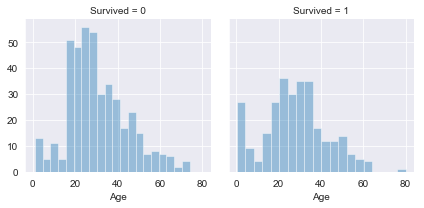

In [14]:
g = sns.FacetGrid(data=train,col='Survived')
g.map(sns.distplot,'Age',kde=False,bins=20)

* **婴儿存活率较高，还有一位80岁老人也幸存**
* **20-40岁之间有大量乘客遇难**

**我们应该在模型训练中考虑 Age**\
**填充空值的 Age 并创建年龄组。**

2. **关联数字和有序特征**

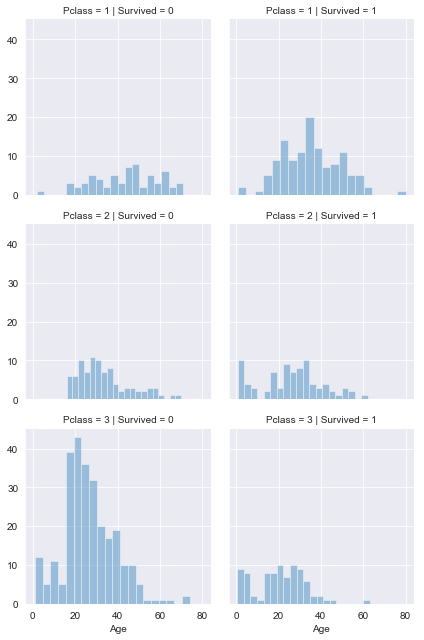

In [15]:
g = sns.FacetGrid(data=train,col='Survived',row='Pclass')
g.map(sns.distplot,'Age',kde=False,bins=20)

* **1客舱中幸存人数较多，大多是中年人，80岁老人位于1号客舱**
* **1号客舱中40岁以上的乘客较多**
* **2号客舱与3号客舱中有大量婴儿获救**
* **3号客舱遇难人数众多，幸存率较低**

**考虑使用 Pclass 进行模型训练。**

3. **关联分类特征**

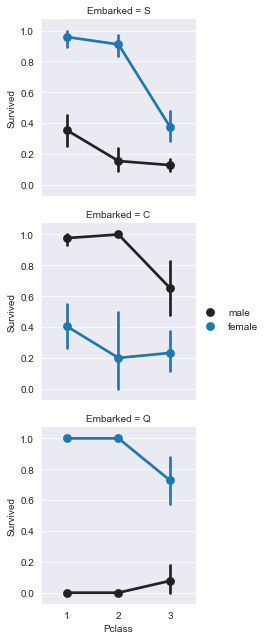

In [16]:
g = sns.FacetGrid(data=train,row='Embarked')
g.map(sns.pointplot,'Pclass','Survived','Sex')
g.add_legend()

* **S和Q港上船的人中女性的幸存率均高于男性**
* **Q港的男性生存率远低于S和C港**
* **?在 Embarked = C 中的例外情况，其中男性具有更高的存活率。这可能是 Pclass 和 Embarked 之间的相关性，反过来是 Pclass 和 Survived，不一定是 Embarked 和 Survived 之间的直接相关。**

**将性别功能添加到模型训练中。**\
**完成并添加 Embarked 特征以进行模型训练。**

4. **关联分类与数字特征**

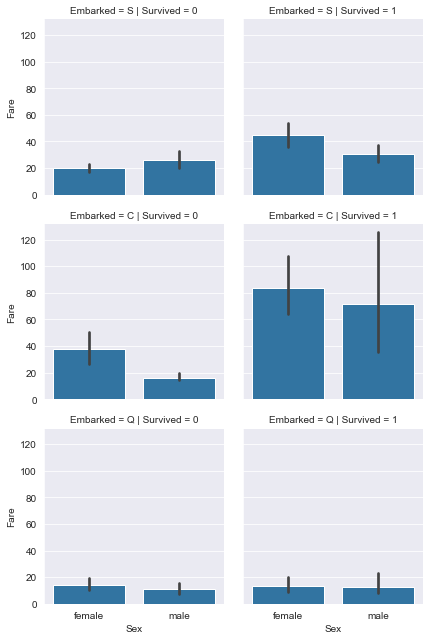

In [17]:
g = sns.FacetGrid(data=train,row='Embarked',col='Survived')
g.map(sns.barplot,'Sex','Fare')
g.add_legend()

* **幸存者中C港的票价最高，Q港的票价最低**
* **票价高的乘客，有高的生存率**

**考虑绑定票价特征**

## 整理数据

### 丢弃数据

In [18]:
train.drop(['PassengerId','Cabin','Ticket'],axis=1,inplace=True)
test.drop(['PassengerId','Cabin','Ticket'],axis=1,inplace=True)
display(train.shape,test.shape)

(891, 9)

(418, 8)

In [19]:
train['title'] = train['Name'].str.extract('([A-Za-z]+)\.')
test['title'] = train['Name'].str.extract('([A-Za-z]+)\.')

ts = pd.pivot_table(data=train,index='title',columns='Sex',values='Survived',aggfunc='count')
ts.fillna(0,inplace=True)
ts

Sex,female,male
title,,
Capt,0.0,1.0
Col,0.0,2.0
Countess,1.0,0.0
Don,0.0,1.0
Dr,1.0,6.0
Jonkheer,0.0,1.0
Lady,1.0,0.0
Major,0.0,2.0
Master,0.0,40.0


* **大多数的 Title 与年龄组挂钩。**
* **Miss，Mrs，Master，Mr有大量人幸存**

**我们决定保留新的 Title 特征以进行模型训练。**

In [20]:
train['title'] = train['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['title'] = train['title'].replace('Mlle', 'Miss')
train['title'] = train['title'].replace('Ms', 'Miss')
train['title'] = train['title'].replace('Mme', 'Mrs')

test['title'] = test['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['title'] = test['title'].replace('Mlle', 'Miss')
test['title'] = test['title'].replace('Ms', 'Miss')
test['title'] = test['title'].replace('Mme', 'Mrs')

train[['title','Survived']].groupby('title').mean()

,Survived
title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [21]:
train['title'] = train['title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
test['title'] = test['title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [22]:
del train['Name']
del test['Name']
display(train.shape,test.shape)

(891, 9)

(418, 8)

## 转换分类特征

In [23]:
train['Sex'] = train['Sex'].map({'female':1,'male':0})
test['Sex'] = test['Sex'].map({'female':1,'male':0})
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## 补充数字连续特征

In [24]:
ta = train.groupby('title').mean()['Age'].reset_index()
train = pd.merge(train,ta,on='title')
train['Age_x'].fillna(train['Age_y'],inplace=True)
del train['Age_y']
train.rename(columns={'Age_x':'Age'},inplace=True)
train['Age'].describe()

train['Age_range'] = pd.cut(train['Age'],5)
train.groupby('Age_range').mean()['Survived'].reset_index()

train['Age_range'] = train['Age_range'].astype(str)
age_range = ['(0.34, 16.336]','(16.336, 32.252]','(32.252, 48.168]','(48.168, 64.084]','(64.084, 80.0]']
for i,z in zip(age_range,range(5)):
    train.loc[train['Age_range']==i,'Age'] = z
train['Age'] = train['Age'].astype(int)

In [25]:
ta = test.groupby('title').mean()['Age'].reset_index()
test = pd.merge(test,ta,on='title')
test['Age_x'].fillna(test['Age_y'],inplace=True)
del test['Age_y']
test.rename(columns={'Age_x':'Age'},inplace=True)
test['Age'].describe()

test['Age_range'] = pd.cut(test['Age'],5)
test['Age_range'].value_counts()

test['Age_range'] = test['Age_range'].astype(str)
age_range = ['(0.0942, 15.336]','(15.336, 30.502]','(30.502, 45.668]','(45.668, 60.834]','(60.834, 76.0]']
for i,z in zip(age_range,range(5)):
    test.loc[test['Age_range']==i,'Age'] = z
test['Age'] = test['Age'].astype(int)

## 组合现有特征生成新特征

In [26]:
train['familysize'] = train['SibSp']+train['Parch']+1
test['familysize'] = test['SibSp']+test['Parch']+1

train.groupby('familysize').mean()['Survived'].reset_index().sort_values(by='Survived',ascending=False)

,familysize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


* **家庭成员少于5人的存活率较高**

In [27]:
train['isAlone'] = 0
train['isAlone'][train['familysize']==1] = 1 

test['isAlone'] = 0
test['isAlone'][test['familysize']==1] = 1 

train.groupby('isAlone').mean()['Survived'].reset_index().sort_values(by='Survived',ascending=False)

,isAlone,Survived
0,0,0.505650
1,1,0.303538


* **孤身一人的幸存率较低**

## 补充分类特征

In [28]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)

train.groupby('Embarked').mean()['Survived'].reset_index().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [29]:
train['Embarked'] = train['Embarked'].map({'S':0,'Q':1,'C':2}).astype(int)
test['Embarked'] = test['Embarked'].map({'S':0,'Q':1,'C':2}).astype(int)

In [30]:
del test['Age_range']
del train['Age_range']

## 快速填充缺失特征

In [31]:
test['Fare'].fillna(test['Fare'].median(),inplace=True)
test['Fare'].describe()

count    418.000000
mean      35.576535
std       55.850103
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

In [32]:
train['fare_range'] = pd.qcut(train['Fare'],4)
train.groupby('fare_range').mean()['Survived'].reset_index()

train['fare_range'] = train['fare_range'].astype(str)
fare_range = ['(-0.001, 7.91]','(7.91, 14.454]','(14.454, 31.0]','(31.0, 512.329]']
for i,z in zip(fare_range,range(4)):
    train.loc[train['fare_range']==i,'Fare'] = z
del train['fare_range']

train['Fare'] = train['Fare'].astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,familysize,isAlone
0,0,3,0,1,1,0,0,0,1,2,0
1,0,3,0,2,0,0,1,0,1,1,1
2,0,3,0,2,0,0,1,1,1,1,1
3,0,1,0,3,0,0,3,0,1,1,1
4,0,3,0,1,0,0,1,0,1,1,1


In [33]:
test['fare_range'] = pd.qcut(test['Fare'],4)
test['fare_range'].value_counts()
test['fare_range'] = test['fare_range'].astype(str)
fare_range = ['(-0.001, 7.896]','(7.896, 14.454]','(14.454, 31.472] ','(31.472, 512.329]']
for i,z in zip(fare_range,range(4)):
    test.loc[test['fare_range']==i,'Fare'] = z
del test['fare_range']

test['Fare'] = test['Fare'].astype(int)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,familysize,isAlone
0,3,0,2,0,0,0,1,1,1,1
1,3,1,1,1,1,1,0,1,3,0
2,3,0,0,0,0,1,0,1,1,1
3,3,1,1,0,0,0,1,1,1,1
4,1,1,1,1,0,3,0,1,2,0


## 建模

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

### 加入创建的特征

In [38]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(train[['Pclass','Sex','Age','familysize','Fare','Embarked','title']],train['Survived'],test_size=0.3)

In [45]:
params = {'weights':['distance','uniform'],
         'n_neighbors':[*range(20)],
         'p':[1,2],
         'leaf_size':[*range(30,50)]}

knn = KNeighborsClassifier()
g = GridSearchCV(knn,params,cv=10)
g.fit(xtrain1,ytrain1)

display(g.best_params_,g.best_score_)

{'leaf_size': 30, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

0.8474910394265234

In [37]:
params = {'criterion':['gini','entropy'],
         'splitter':['best','random'],
         'max_depth':[*range(10)],
         'min_samples_split':[*range(10)],
         'min_samples_leaf':[*range(10)]}
clf = DecisionTreeClassifier(random_state=20)
g = GridSearchCV(clf,params,cv=10)
g.fit(xtrain1,ytrain1)

display(g.best_params_,g.best_score_)

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

0.8281874039938556

In [39]:
clf = DecisionTreeClassifier(random_state=20,max_depth=4,min_samples_leaf=3,min_samples_split=2,splitter='random')
clf = clf.fit(xtrain1,ytrain1)
clf.score(xtest1,ytest1)

test['Survived'] = clf.predict(test[['Pclass','Sex','Age','familysize','Fare','Embarked','title']])
final = pd.concat([final,test['Survived']],axis=1)
final.head()
final.to_csv('my_submission.csv',index=False)
print('finished!')

finished!


### 使用原特征

In [41]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']],train['Survived'],test_size=0.3)

In [42]:
params = {'weights':['distance','uniform'],
         'n_neighbors':[*range(20)],
         'p':[1,2],
         'leaf_size':[*range(30,50)]}

knn = KNeighborsClassifier()
g = GridSearchCV(knn,params,cv=10)
g.fit(xtrain2,ytrain2)

display(g.best_params_,g.best_score_)

{'leaf_size': 36, 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

0.8055555555555556

In [43]:
params = {'criterion':['gini','entropy'],
         'splitter':['best','random'],
         'max_depth':[*range(10)],
         'min_samples_split':[*range(10)],
         'min_samples_leaf':[*range(10)]}
clf = DecisionTreeClassifier(random_state=20)
g = GridSearchCV(clf,params,cv=10)
g.fit(xtrain2,ytrain2)

display(g.best_params_,g.best_score_)

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'splitter': 'random'}

0.8103430619559651